In [50]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [51]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [52]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from datetime import datetime, timedelta
import os


In [53]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [54]:
# troubleshooting file path issues
print(os.path.exists("Resources/hawaii.sqlite"))  # Should return True if the file exists


True


In [55]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)

# reflect the tables
print(Base.classes.keys())

['station', 'measurement']


In [56]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [57]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [58]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [59]:
# Find the most recent date in the data set.

recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
print(f"('{recent_date}',)")


('2017-08-23',)


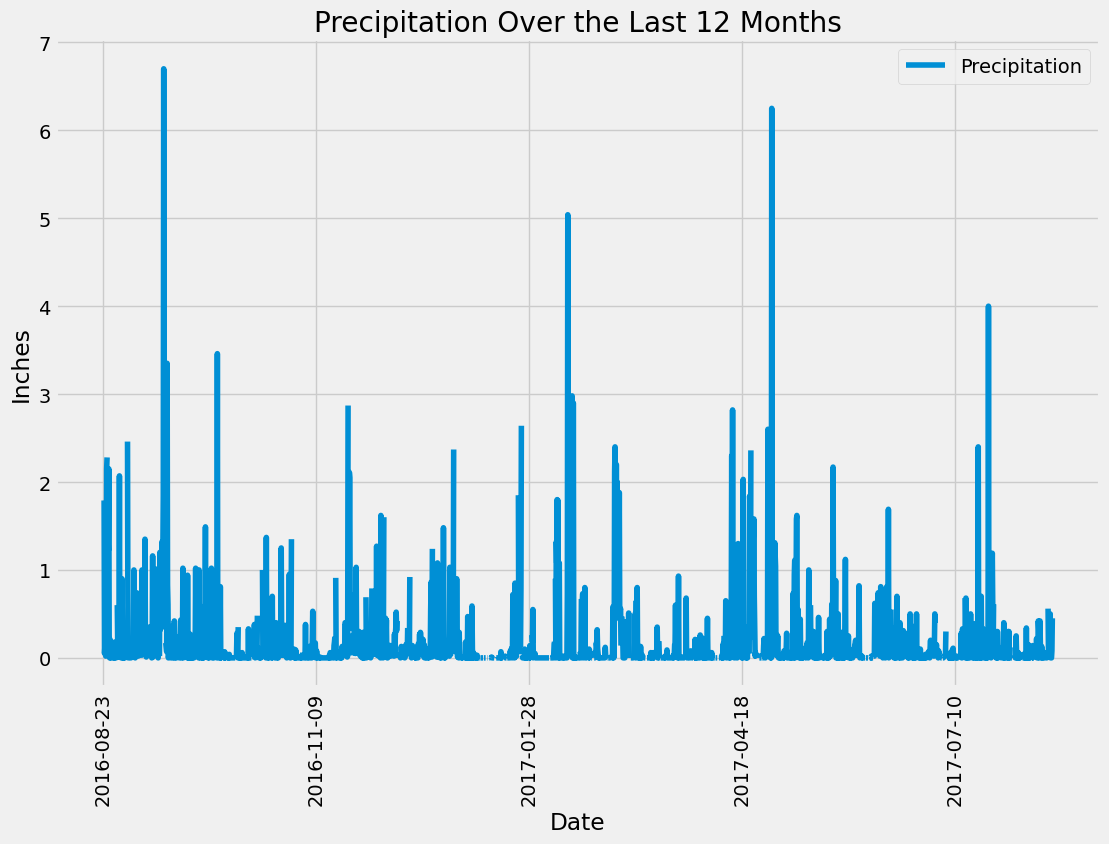

In [65]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 


# Calculate the date one year from the last date in data set.

one_year_ago = (pd.to_datetime(recent_date) - pd.DateOffset(years=1)).strftime('%Y-%m-%d')

# Perform a query to retrieve the data and precipitation scores

precipitation_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names

precipitation_df = pd.DataFrame(precipitation_data, columns=['Date', 'Precipitation'])

# Sort the dataframe by date

precipitation_df = precipitation_df.sort_values("Date")

# Use Pandas Plotting with Matplotlib to plot the data

precipitation_df.set_index('Date').plot(figsize=(12, 8), rot=90, legend=True)

# Set the plot title and labels
plt.title("Precipitation Over the Last 12 Months")
plt.ylabel("Inches")
plt.xlabel("Date")
plt.legend(["Precipitation"])

# Show the plot
plt.show()

In [68]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_summary = precipitation_df['Precipitation'].describe()

# Display the summary statistics
print("Summary Statistics for Precipitation Data:")
print(precipitation_summary)


Summary Statistics for Precipitation Data:
count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64


# Exploratory Station Analysis

In [69]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.station)).all()

# Display the result
print(total_stations)


[(9,)]


In [76]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

from pprint import pprint

active_stations = (
    session.query(Measurement.station, func.count(Measurement.station))
    .group_by(Measurement.station)
    .order_by(func.count(Measurement.station).desc())
    .all()
)

# Display the results in the exact format using pprint
pprint(active_stations)



[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]


In [85]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

# The most active station id 
most_active_station = 'USC00519281'

# query to calculate the lowest, highest, and average temperature for the most active station
temperature_stats = (
    session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))
    .filter(Measurement.station == most_active_station)
    .all()
)

# Display the result
print(temperature_stats)


[(54.0, 85.0, 71.66378066378067)]


Text(0.5, 4.183333333333314, 'Temperature')


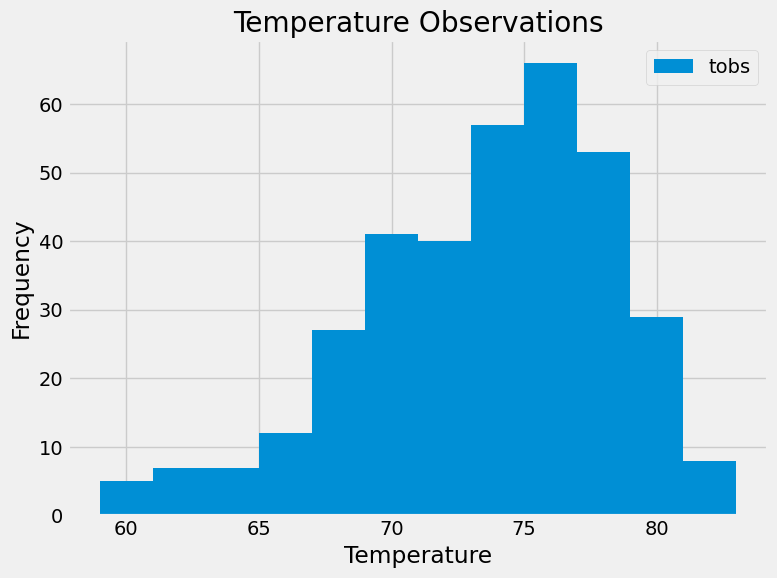

In [94]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

most_active_station = 'USC00519281'

# Calculate the date one year ago from the last date in the dataset
one_year_ago = (pd.to_datetime(recent_date) - pd.DateOffset(years=1)).strftime('%Y-%m-%d')

# Query the last 12 months of temperature observation data for the most active station
temperature_data = (
    session.query(Measurement.tobs)
    .filter(Measurement.station == most_active_station)
    .filter(Measurement.date >= one_year_ago)
    .all()
)

# Convert the query results to a DataFrame
temperature_df = pd.DataFrame(temperature_data, columns=['tobs'])

# Plot the results as a histogram with 12 bins
temperature_df.plot(kind='hist', bins=12, figsize=(8, 6))

# Customize the plot
plt.title(f'Temperature Observations')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

text_obj.set_position((0.5, 4.183333333333314))
print(text_obj)

# Display the histogram
text_obj = plt.xlabel('Temperature')
plt.tight_layout()
plt.show()


# Close Session

In [95]:
# Close Session
session.close()